In [53]:
print("OM")

OM


Import all the python lib/packages required for the BoomBikes dataset for analysis

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date
from datetime import datetime
import xgboost as xgb
# from google.colab import files
from google.colab import files
#uploaded = files.upload()
#bikedata = pd.read_csv('test.csv')
#
import warnings
warnings.filterwarnings(action="ignore")
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
bikedata = pd.read_csv('day.csv')

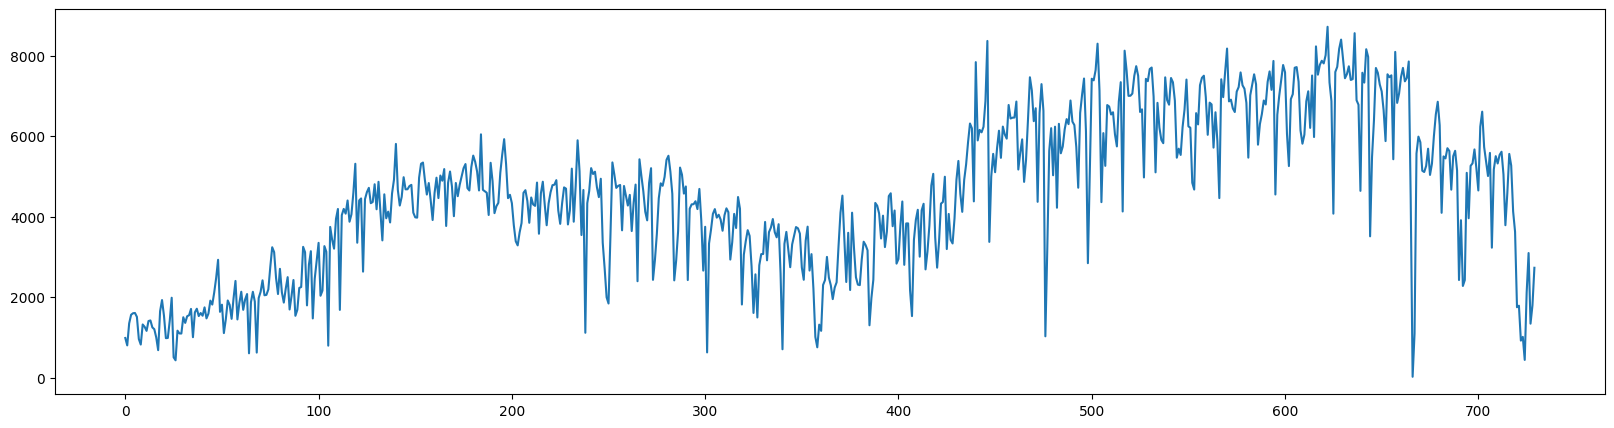

In [65]:
plt.figure(figsize=(20,5))
plt.plot(bikedata.cnt)
plt.show()

Check all the Null, duplicated values and its shape.

In [66]:
print(bikedata.isnull().sum())
print(bikedata.shape)
print(bikedata.duplicated().sum()) # Check for any duplicate entries

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64
(730, 16)
0


Printing unique values and describe the dataset

In [67]:
# Printing unique values and describe the dataset
key_fields = bikedata.columns
percentage_uniqueness = {}
print(key_fields)
for field in key_fields:
    unique_percentage = bikedata[field].nunique() / bikedata[field].count() * 100
    percentage_uniqueness[field] = unique_percentage

for field, percentage in percentage_uniqueness.items():
    print(f"{field}: {percentage:.2f}% unique")

bikedata.describe()

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')
instant: 100.00% unique
dteday: 100.00% unique
season: 0.55% unique
yr: 0.27% unique
mnth: 1.64% unique
holiday: 0.27% unique
weekday: 0.96% unique
workingday: 0.27% unique
weathersit: 0.41% unique
temp: 68.22% unique
atemp: 94.38% unique
hum: 81.37% unique
windspeed: 88.90% unique
casual: 82.88% unique
registered: 92.88% unique
cnt: 95.21% unique


instant      season          yr        mnth     holiday     weekday  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean   365.500000    2.498630    0.500000    6.526027    0.028767    2.997260   
std    210.877136    1.110184    0.500343    3.450215    0.167266    2.006161   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.250000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    365.500000    3.000000    0.500000    7.000000    0.000000    3.000000   
75%    547.750000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    730.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean     0.683562    1.394521   20.319259   23.726322   62.765175   12.763620   
std      0.465405    0.544807    7.506729    8.150308   14.237589    5.195841   
min      0.000000    1.000000    2.424346    3.953480    0.000000    1.500244   
25%      0.000000    1.000000   13.811885   16.889713   52.000000    9.041650   
50%      1.000000    1.000000   20.465826   24.368225   62.625000   12.125325   
75%      1.000000    2.000000   26.880615   30.445775   72.989575   15.625589   
max      1.000000    3.000000   35.328347   42.044800   97.250000   34.000021   

            casual   registered          cnt  
count   730.000000   730.000000   730.000000  
mean    849.249315  3658.757534  4508.006849  
std     686.479875  1559.758728  1936.011647  
min       2.000000    20.000000    22.000000  
25%     316.250000  2502.250000  3169.750000  
50%     717.000000  3664.500000  4548.500000  
75%    1096.500000  4783.250000  5966.000000  
max    3410.000000  6946.000000  8714.000000

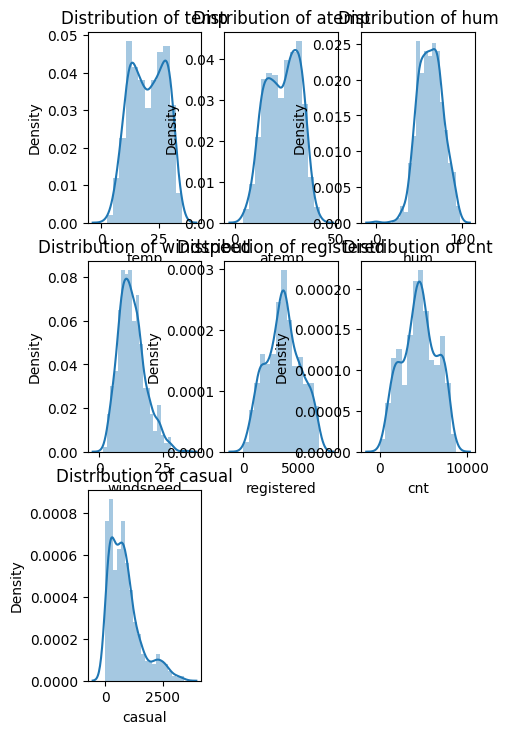

In [68]:
#Distribution plot for variables to check any outliers
import warnings
warnings.filterwarnings(action="ignore")
num_cont_vaiables = ['temp','atemp', 'hum', 'windspeed', 'registered', 'cnt', 'casual']
plt.figure(figsize=(5,10))
for i,m in enumerate(num_cont_vaiables):
    plt.subplot(4,3,i+1)
    sns.distplot(bikedata[m])
    plt.title('Distribution of ' + m)
    plt.xlabel(m)
    plt.ylabel('Density')
    plt.subplots_adjust(bottom = 0.002)
plt.show()

##Distribution plot for variables to check any outliers

In [69]:
season_dummies = pd.get_dummies(bikedata['season'], prefix='season',drop_first=True)
season_dummies.head()
bikedata = pd.concat([bikedata, season_dummies], axis=1)
weathersit_dummies = pd.get_dummies(bikedata['weathersit'], prefix='weathersit',drop_first=True)# dummy variable creation
bikedata = pd.concat([bikedata,weathersit_dummies], axis = 1) #adding to original dataset

bikedata=bikedata.drop(columns=['season','weathersit'])
bikedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   instant       730 non-null    int64  
 1   dteday        730 non-null    object 
 2   yr            730 non-null    int64  
 3   mnth          730 non-null    int64  
 4   holiday       730 non-null    int64  
 5   weekday       730 non-null    int64  
 6   workingday    730 non-null    int64  
 7   temp          730 non-null    float64
 8   atemp         730 non-null    float64
 9   hum           730 non-null    float64
 10  windspeed     730 non-null    float64
 11  casual        730 non-null    int64  
 12  registered    730 non-null    int64  
 13  cnt           730 non-null    int64  
 14  season_2      730 non-null    uint8  
 15  season_3      730 non-null    uint8  
 16  season_4      730 non-null    uint8  
 17  weathersit_2  730 non-null    uint8  
 18  weathersit_3  730 non-null    

# Create the Box plots to see the CNT vaules highest in which period / time / context. It helps to understand the contribution factors for the CNT.

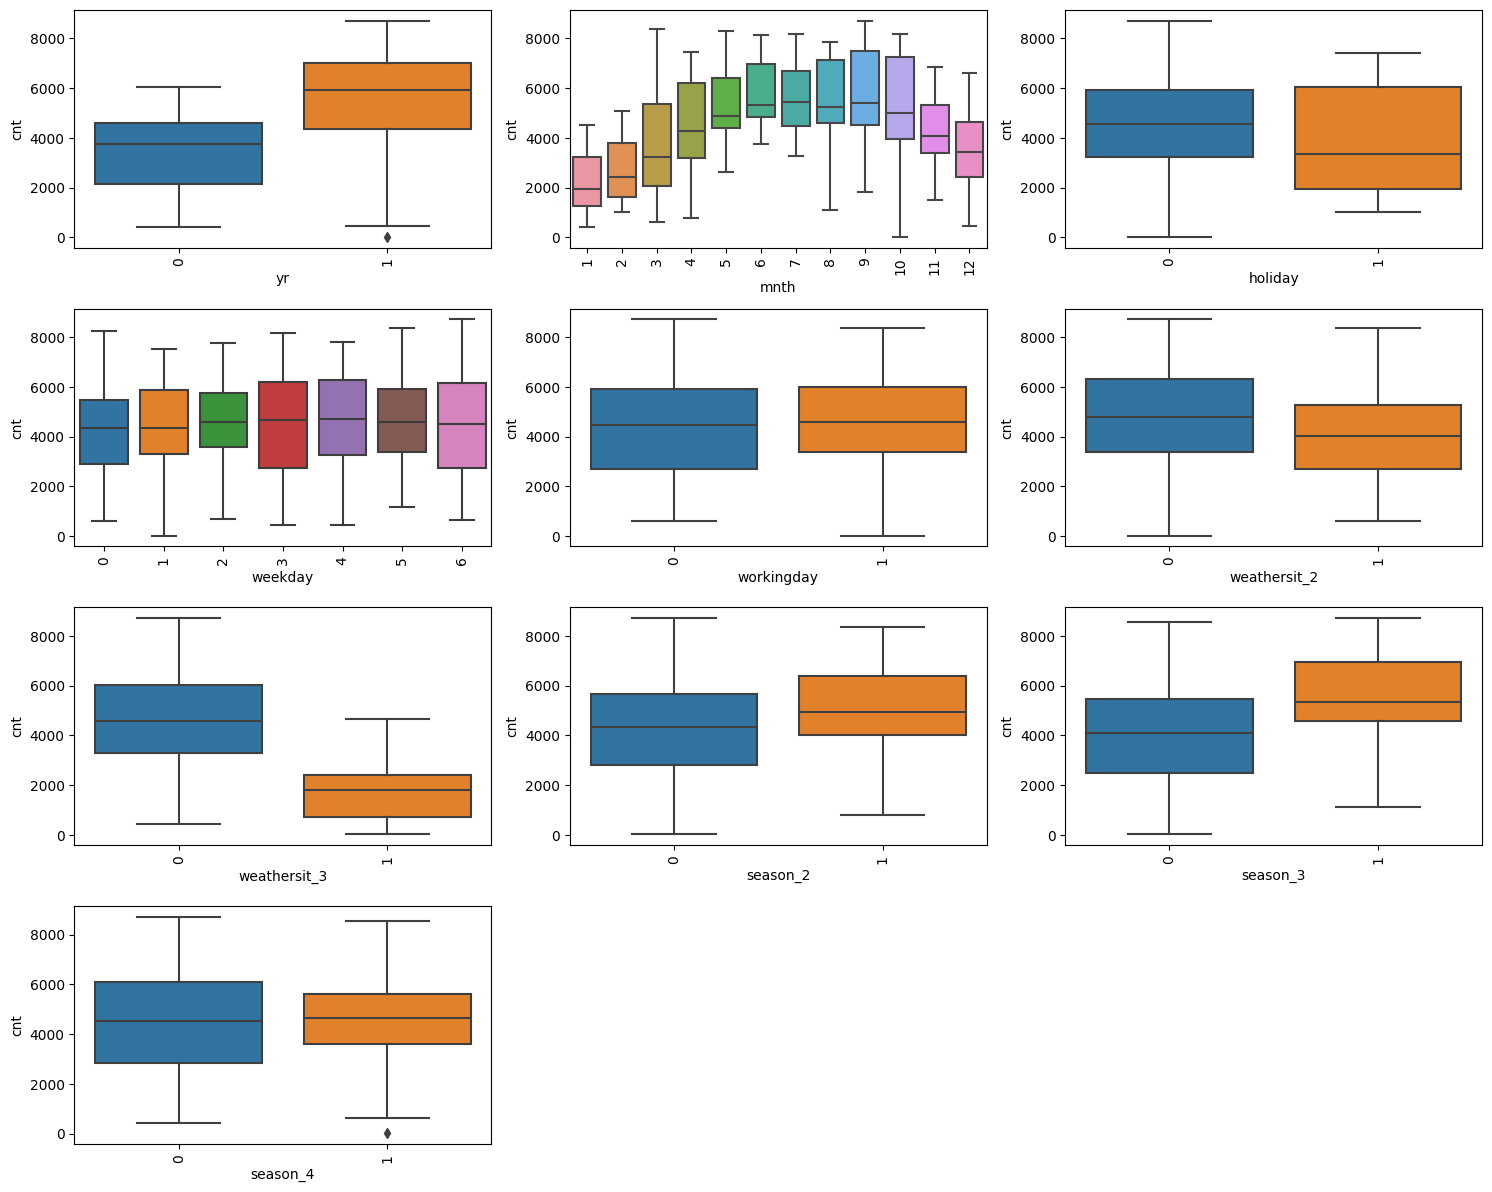

In [70]:
bikedata.head()
categorical_vaiables = ['yr','mnth','holiday','weekday', 'workingday','weathersit_2','weathersit_3','season_2','season_3','season_4']

# Box plot for categorical variables
plt.figure(figsize=(15,12))
for i in list(enumerate(categorical_vaiables)):
    plt.subplot(4,3,i[0]+1)
    sns.boxplot(x = i[1], y = 'cnt', data = bikedata)
    plt.xticks(rotation = 90)
plt.tight_layout(pad = 1)
plt.show()


The count CNT feature is high during Autumn, mid of year and weathersit 1

Type Casting

In [71]:
#type casting

bikedata[['temp', 'atemp', 'hum', 'windspeed']] = bikedata[['temp', 'atemp', 'hum', 'windspeed']].astype(float)
bikedata[['yr', 'mnth', 'holiday', 'weekday','workingday','cnt']] = bikedata[['yr', 'mnth', 'holiday', 'weekday','workingday','cnt']].astype(int)
bikedata.dtypes

instant           int64
dteday           object
yr                int64
mnth              int64
holiday           int64
weekday           int64
workingday        int64
temp            float64
atemp           float64
hum             float64
windspeed       float64
casual            int64
registered        int64
cnt               int64
season_2          uint8
season_3          uint8
season_4          uint8
weathersit_2      uint8
weathersit_3      uint8
dtype: object

### Heatmap created to understand the co-relation between the features.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


<Axes: >

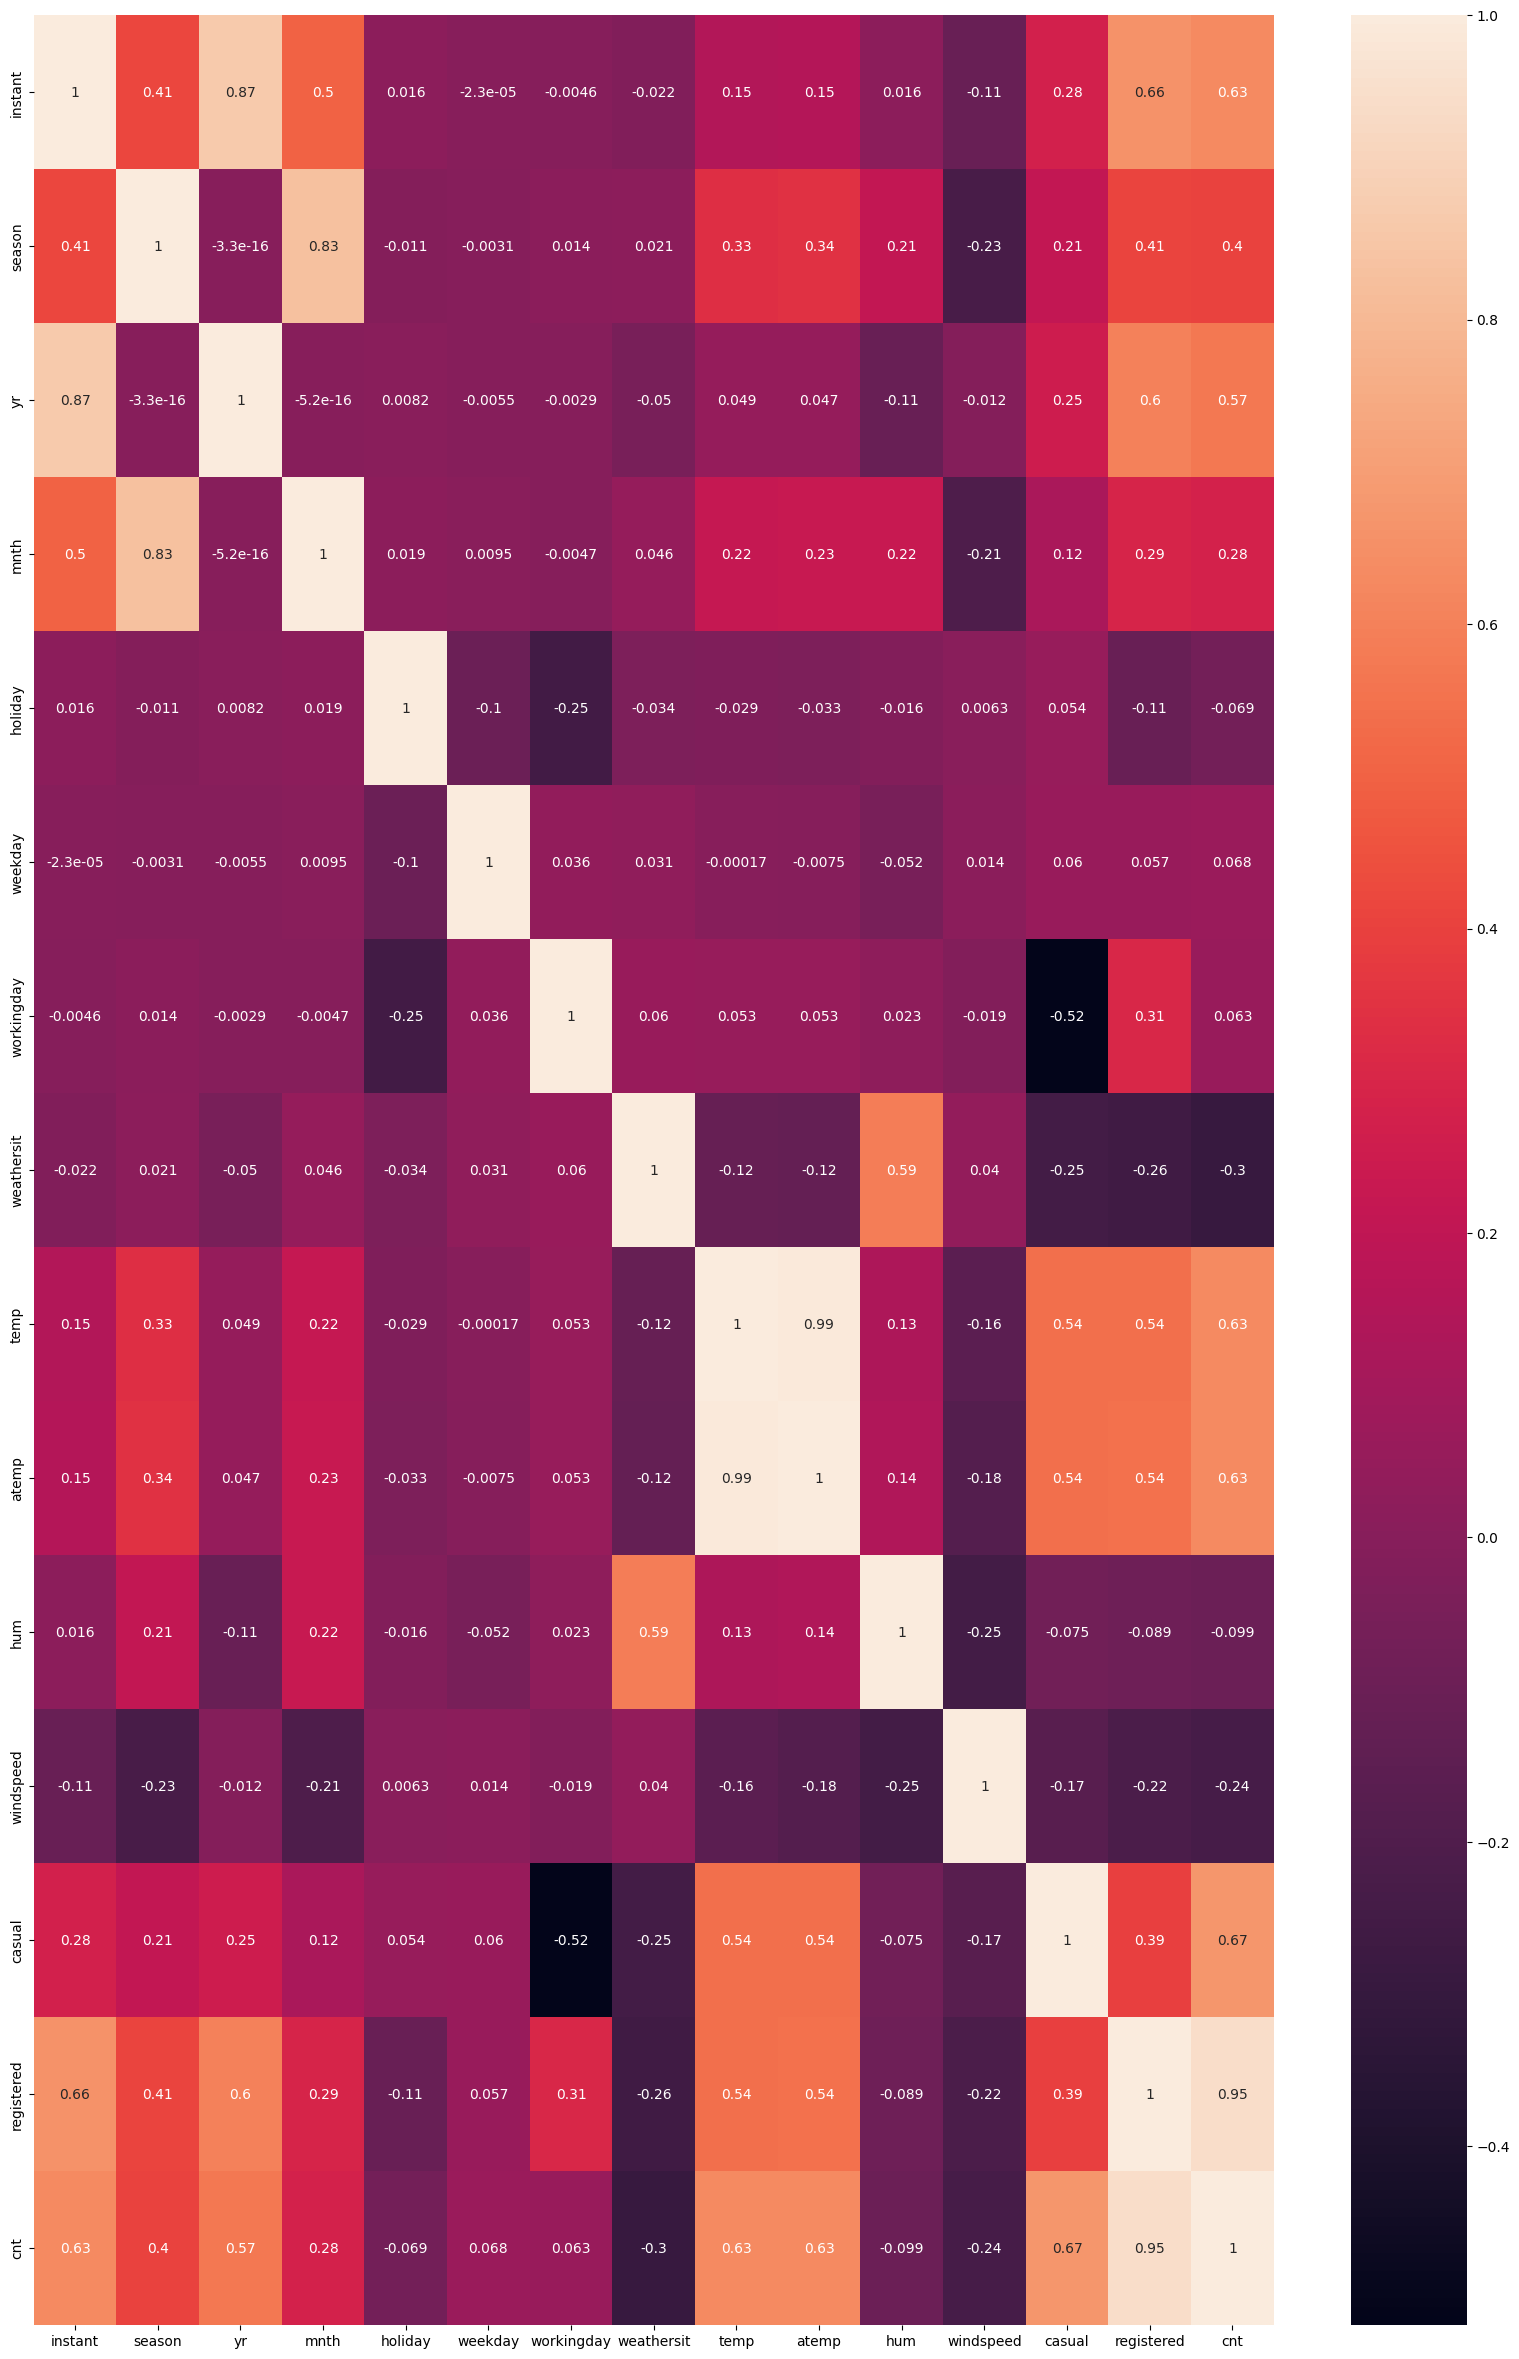

In [90]:
bikedata.columns
bikedata.info()
plt.figure(figsize=(20, 30))
# bikedata_float=bikedata.astype(float)
sns.heatmap(bikedata.corr(),annot=True)

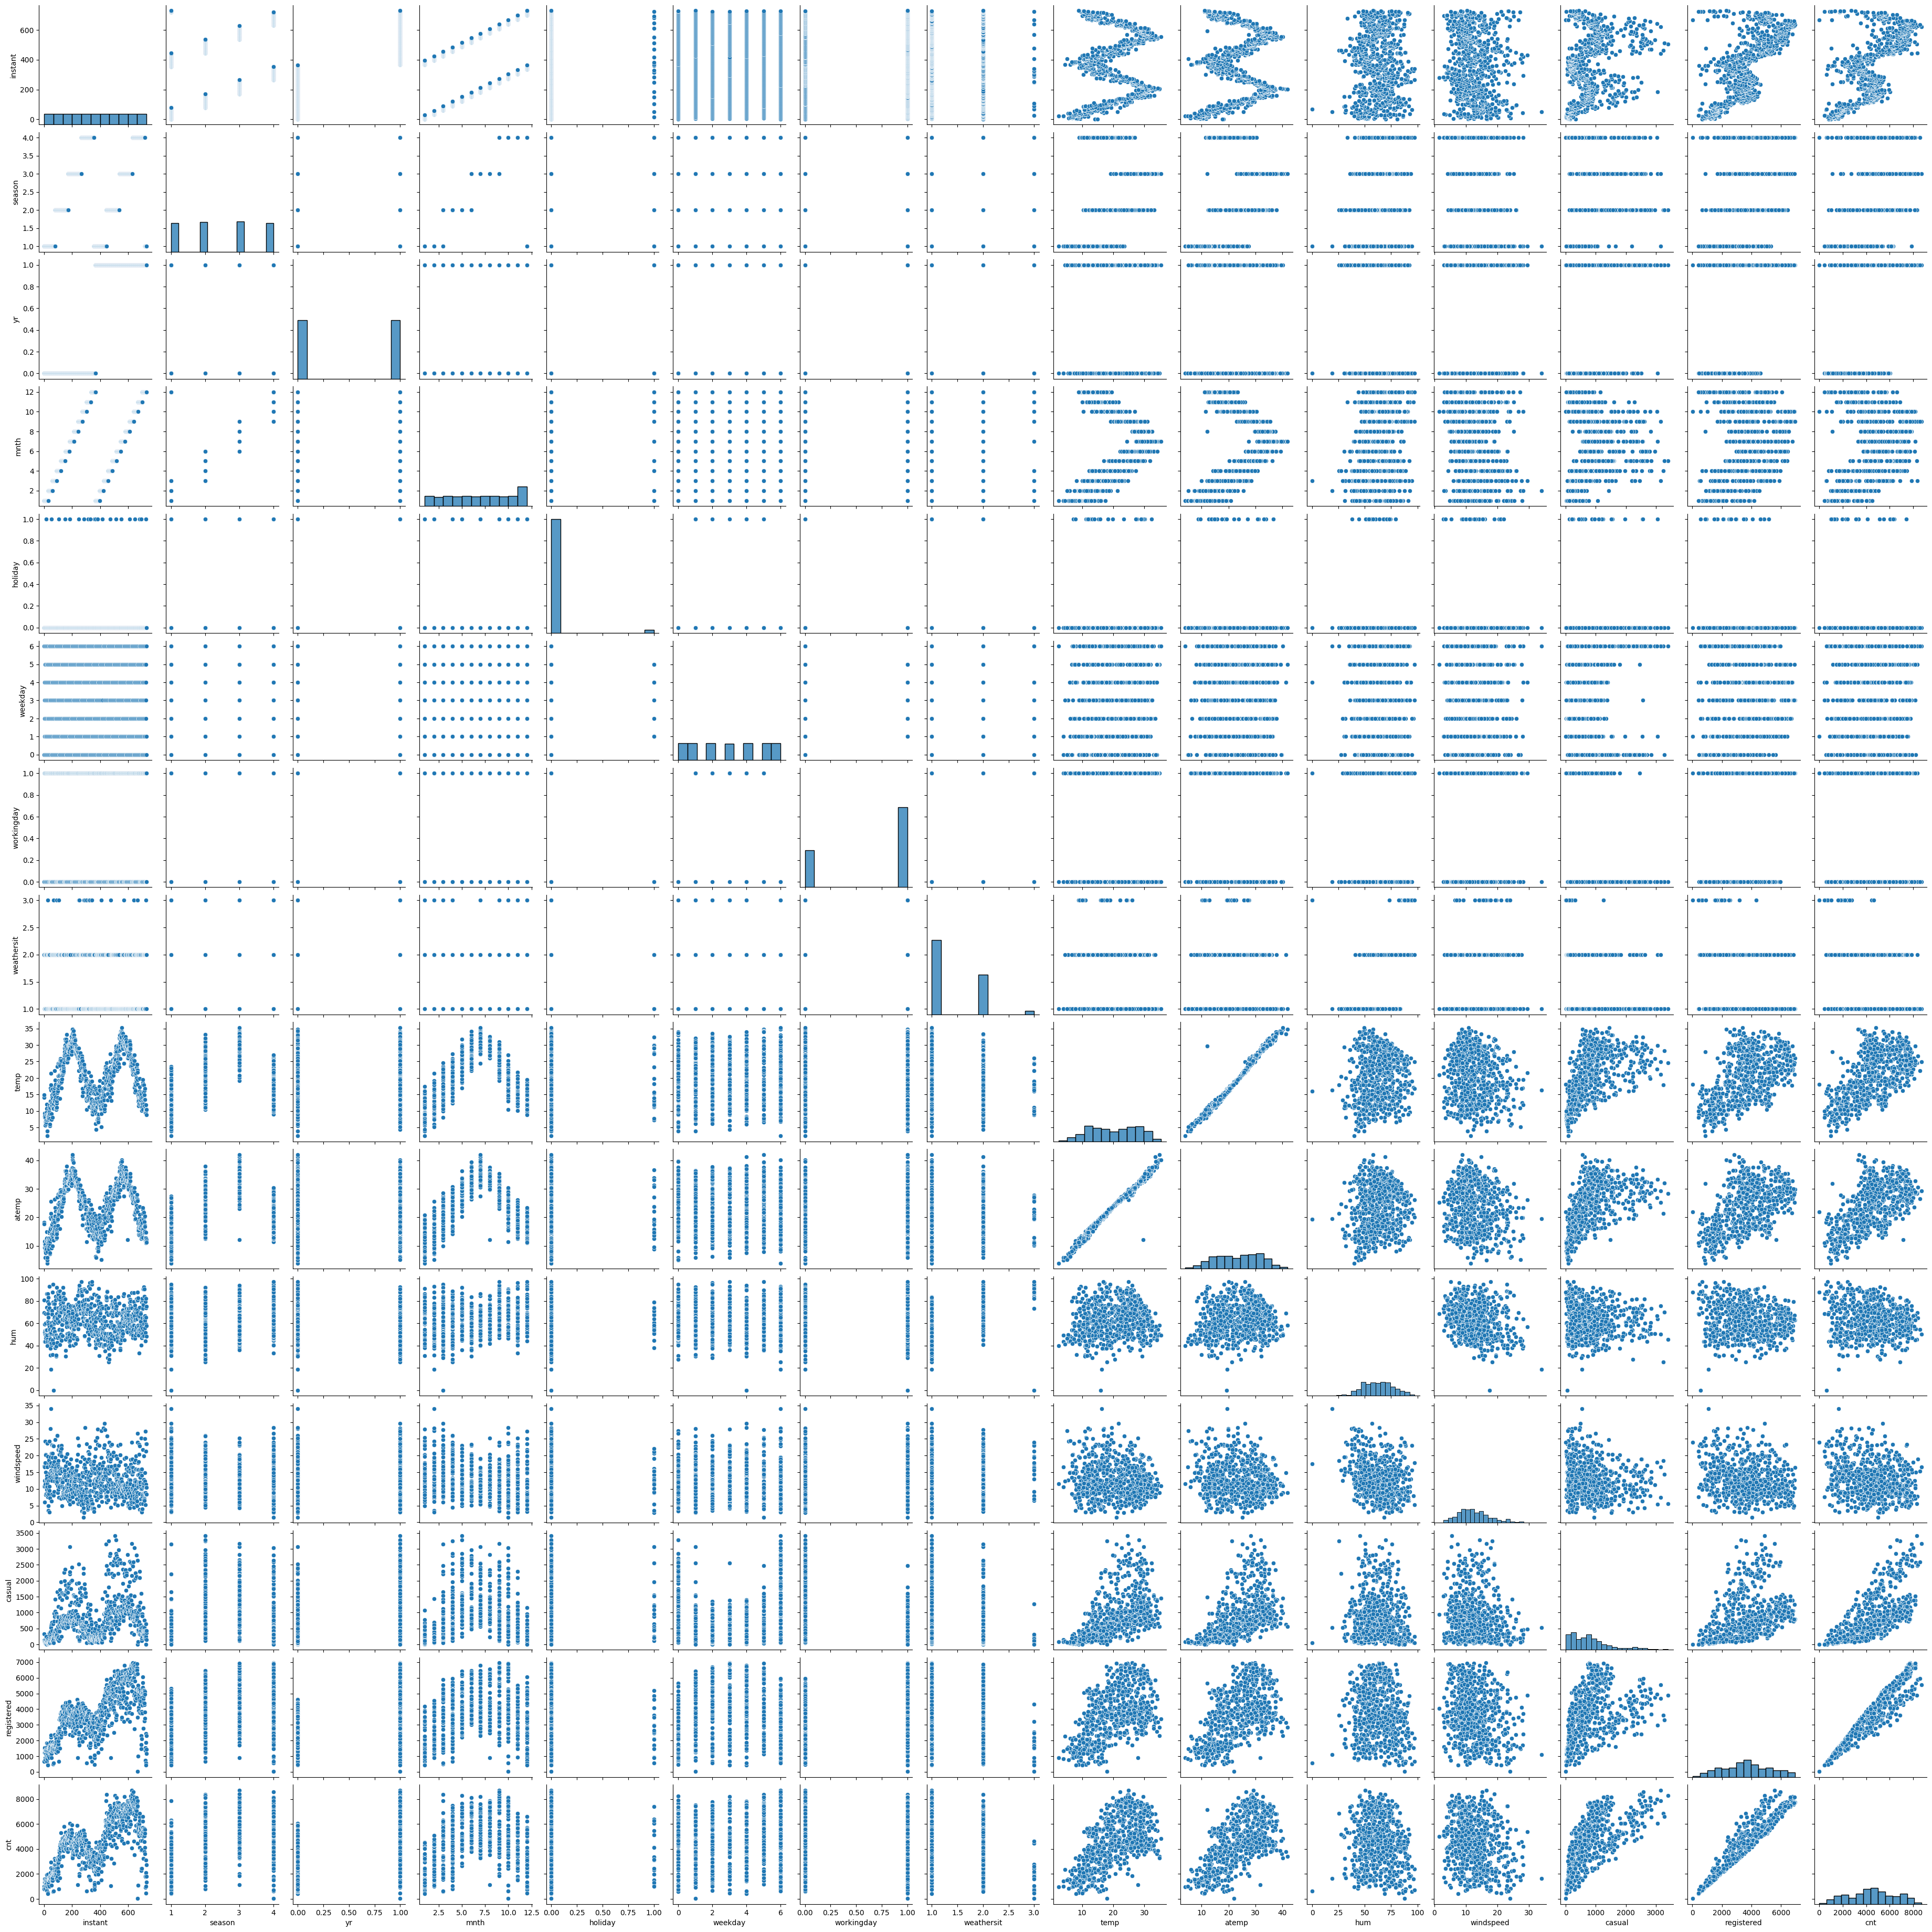

In [91]:
sns.pairplot(bikedata.select_dtypes(include=['int', 'float']))

Inferences from plot
The demand of bike is less in the month of spring when compared with other seasons
The demand bike increased in the year 2019 when compared with year 2018.
Month Jun to Oct is the period when bike demand is high. Lowest during month Jan.
Bike demand is hight during non-holidays.
Demmand seems uniform throughout weekdays and same is for working and non-working day
Outliers are not seen here.


Dropped the features not relevent for the target feature CNT

In [72]:
bikedata.drop(['instant', 'casual', 'registered', 'dteday'], axis=1, inplace=True)
print(bikedata.shape)
bikedata.head()

(730, 15)


yr  mnth  holiday  weekday  workingday       temp     atemp      hum  \
0   0     1        0        6           0  14.110847  18.18125  80.5833   
1   0     1        0        0           0  14.902598  17.68695  69.6087   
2   0     1        0        1           1   8.050924   9.47025  43.7273   
3   0     1        0        2           1   8.200000  10.60610  59.0435   
4   0     1        0        3           1   9.305237  11.46350  43.6957   

   windspeed   cnt  season_2  season_3  season_4  weathersit_2  weathersit_3  
0  10.749882   985         0         0         0             1             0  
1  16.652113   801         0         0         0             1             0  
2  16.636703  1349         0         0         0             0             0  
3  10.739832  1562         0         0         0             0             0  
4  12.522300  1600         0         0         0             0             0

Split the dataset to ratio 70:30

In [73]:
from sklearn.model_selection import train_test_split
X_train, X_test = train_test_split(bikedata, train_size= 0.7, random_state=30)#creating test and train dataset
print(X_train.shape)
print(X_test.shape)

(510, 15)
(220, 15)


# List of columns scaled for transformation. The trained data set to fit and transform and used the scaler for transform for the test data.

In [74]:
#bikedata.columns

scaler = MinMaxScaler()#call scaler
num_vars = ['mnth','weekday','temp', 'atemp', 'hum', 'windspeed', 'cnt']#list of columns to be scaled
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])#column scaling
X_test[num_vars] = scaler.transform(X_test[num_vars])#column scaling
X_train.head() #checking dataset


yr      mnth  holiday   weekday  workingday      temp     atemp  \
155   0  0.454545        0  0.000000           0  0.720868  0.690038   
108   0  0.272727        0  0.333333           1  0.534417  0.513618   
493   1  0.363636        0  0.500000           1  0.624917  0.601819   
405   1  0.090909        0  0.833333           1  0.240020  0.242927   
90    0  0.272727        0  0.833333           1  0.265099  0.228951   

          hum  windspeed       cnt  season_2  season_3  season_4  \
155  0.670951   0.239759  0.561896         1         0         0   
108  0.684661   0.279504  0.366084         1         0         0   
493  0.765210   0.399983  0.540152         1         0         0   
405  0.555270   0.194894  0.438219         0         0         0   
90   0.705656   0.487178  0.253682         1         0         0   

     weathersit_2  weathersit_3  
155             1             0  
108             1             0  
493             1             0  
405             1             0  
90              1             0

In [75]:
X_test.head(2)

yr      mnth  holiday   weekday  workingday      temp     atemp  \
293   0  0.818182        0  0.833333           1  0.431924  0.422794   
334   0  1.000000        0  0.666667           1  0.281454  0.259520   

          hum  windspeed       cnt  season_2  season_3  season_4  \
293  0.590403   0.410258  0.492637         0         0         1   
334  0.539417   0.407706  0.426254         0         0         1   

     weathersit_2  weathersit_3  
293             0             0  
334             0             0

In [78]:



y1_train = X_train['cnt'] #target of train data
X1_train = X_train.drop(['cnt', 'temp'], axis=1)#pridicictor of training data
y1_test = X_test['cnt']
X1_test=X_test.drop(['cnt', 'temp'], axis=1)
print(y1_train.shape)
print(X1_train.shape)
print(y1_test.shape)
print(X1_test.shape)


(510,)
(510, 13)
(220,)
(220, 13)


In [89]:
params = {
    'objective': 'reg:squarederror',  # Use 'reg:squarederror' for regression tasks
    'max_depth': 2,
    'learning_rate': 0.1,
    'n_estimators':100,
    'subsample': 0.8,
    'colsample_bytree': 0.8
}

# Create an XGBoost regressor with the specified parameters
model = xgb.XGBRegressor(**params, random_state=42)

# Train the model
model.fit(X1_train, y1_train)

# Make predictions on the test set
y_pred = model.predict(X1_test)
y_pred_train = model.predict(X1_train)
print('Train R2 Value ::>>',r2_score(y1_train, y_pred_train))

# Calculate Mean Squared Error
rmse = round(r2_score(y1_test, y_pred),4)
print(f'R2 Value: {rmse}')
# Print feature importances
feature_importances = pd.Series(model.feature_importances_, index=X1_train.columns)
print("Feature Importances:")
print(feature_importances)

Train R2 Value ::>> 0.9193406074726336
R2 Value: 0.8516
Feature Importances:
yr              0.366905
mnth            0.112416
holiday         0.012894
weekday         0.010726
workingday      0.019876
atemp           0.208465
hum             0.039786
windspeed       0.021618
season_2        0.011544
season_3        0.004960
season_4        0.080601
weathersit_2    0.031936
weathersit_3    0.078272
dtype: float32


## creating instant of linear regression

In [81]:

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.feature_selection import RFE
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
#creating instant of linear regression
lm = LinearRegression()

#training the model without any feature elimination
lm.fit(X1_train, y1_train)

LinearRegression()

## Get the model predicted for the trained data.

In [82]:
y1_train_pred = lm.predict(X1_train)
#predicition of target variable in train data set
r2_score(y_true= y1_train, y_pred=y1_train_pred)
#checking r2 score

0.8256989390631787

Prepare for the RFE

In [34]:

#bikedata.drop(columns=['dteday'],inplace=True)
import numpy as np
bikedata=bikedata.astype(np.float64)
bikedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            730 non-null    float64
 1   mnth          730 non-null    float64
 2   holiday       730 non-null    float64
 3   weekday       730 non-null    float64
 4   workingday    730 non-null    float64
 5   temp          730 non-null    float64
 6   atemp         730 non-null    float64
 7   hum           730 non-null    float64
 8   windspeed     730 non-null    float64
 9   cnt           730 non-null    float64
 10  season_2      730 non-null    float64
 11  season_3      730 non-null    float64
 12  season_4      730 non-null    float64
 13  weathersit_2  730 non-null    float64
 14  weathersit_3  730 non-null    float64
dtypes: float64(15)
memory usage: 85.7 KB


## using RFE(recursive feature elimination) to reduce the dimension of data

In [35]:
#using RFE(recursive feature elimination) to reduce the dimension of data
num_features_to_select=11
rfe = RFE(lm, n_features_to_select=num_features_to_select)
rfe = rfe.fit(X1_train,y1_train)
list(zip(X1_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('mnth', False, 3),
 ('holiday', True, 1),
 ('weekday', True, 1),
 ('workingday', False, 2),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_2', True, 1),
 ('season_3', True, 1),
 ('season_4', True, 1),
 ('weathersit_2', True, 1),
 ('weathersit_3', True, 1)]

## Add constant to the model and get the model summary.

In [36]:
trained_col=X1_train.columns[rfe.support_]
trained_col
#creating training data
#X1_train=X1_train.drop(columns=['season'])
X_train_rfe = X1_train[trained_col]
#adding constant to variable
X_train_sm = sm.add_constant(X_train_rfe)
X_train_sm=X_train_sm.astype(float)
#creating model using statsmodel
lm = sm.OLS(y1_train, X_train_sm) #creating an instant
lm_model = lm.fit() #training the model
lm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     214.0
Date:                Wed, 13 Dec 2023   Prob (F-statistic):          9.43e-181
Time:                        16:22:52   Log-Likelihood:                 487.76
No. Observations:                 510   AIC:                            -951.5
Df Residuals:                     498   BIC:                            -900.7
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2334      0.030      7.755      0.000       0.174       0.293
yr               0.2258      0.008     26.691      0.000       0.209       0.242
holiday         -0.0440      0.022     -1.981      0.048      -0.088      -0.000
weekday          0.0393      0.013      3.139      0.002       0.015       0.064
atemp            0.4590      0.034     13.499      0.000       0.392       0.526
hum             -0.1612      0.039     -4.100      0.000      -0.238      -0.084
windspeed       -0.1563      0.029     -5.437      0.000      -0.213      -0.100
season_2         0.1402      0.015      9.071      0.000       0.110       0.171
season_3         0.0971      0.020      4.750      0.000       0.057       0.137
season_4         0.1648      0.013     12.603      0.000       0.139       0.191
weathersit_2    -0.0381      0.011     -3.424      0.001      -0.060      -0.016
weathersit_3    -0.2123      0.028     -7.548      0.000      -0.268      -0.157
==============================================================================
Omnibus:                       66.723   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              147.771
Skew:                          -0.711   Prob(JB):                     8.17e-33
Kurtosis:                       5.220   Cond. No.                         20.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#Review the VIF for the features

In [37]:
vif = pd.DataFrame()
X_train_rfe.replace([np.inf, -np.inf], np.nan, inplace=True)
X_train_rfe.dropna(inplace=True)

vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif.transpose()

0        1        2      3      4          5         6         7   \
Features    yr  holiday  weekday  atemp    hum  windspeed  season_2  season_3   
VIF       1.96     1.06     2.97  18.77  14.57       4.55      3.45      5.82   

                8             9             10  
Features  season_4  weathersit_2  weathersit_3  
VIF           2.36          2.19           1.2

#Drop temp features for further analysis to get VIF in cotrol

In [38]:

#removing 'hum' variable from dataset
X_train_rfe.drop(['atemp'], axis=1, inplace=True)
#creating model after dropping variable

#adding constant to variable
X_train_sm = sm.add_constant(X_train_rfe)

#creating model using statsmodel
lm = sm.OLS(y1_train, X_train_sm) #creating an instant
lm_model = lm.fit() #training the model
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif.transpose()

0        1        2      3          4         5         6  \
Features    yr  holiday  weekday    hum  windspeed  season_2  season_3   
VIF       1.92     1.06     2.97  10.62       4.51      2.02      2.02   

                 7             8             9  
Features  season_4  weathersit_2  weathersit_3  
VIF           2.03          2.05          1.15

#Final feature hum is required to be removed as its more then 5.

In [39]:

#removing 'hum' variable from dataset
X_train_rfe.drop(['hum'], axis=1, inplace=True)
#creating model after dropping variable

#adding constant to variable
X_train_sm = sm.add_constant(X_train_rfe)

#creating model using statsmodel
lm = sm.OLS(y1_train, X_train_sm) #creating an instant
lm_model = lm.fit() #training the model
#lm_model.summary()
print(lm_model.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif.transpose()


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.760
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                     176.3
Date:                Wed, 13 Dec 2023   Prob (F-statistic):          6.67e-149
Time:                        16:23:07   Log-Likelihood:                 406.99
No. Observations:                 510   AIC:                            -794.0
Df Residuals:                     500   BIC:                            -751.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2605      0.018     14.248   

0        1        2          3         4         5         6  \
Features    yr  holiday  weekday  windspeed  season_2  season_3  season_4   
VIF       1.87     1.04     2.69       3.51      1.71      1.52      1.58   

                     7             8  
Features  weathersit_2  weathersit_3  
VIF                1.5           1.1

In [40]:
#removing 'hum' variable from dataset
X_train_rfe.drop(['holiday'], axis=1, inplace=True)
#creating model after dropping variable

#adding constant to variable
X_train_sm = sm.add_constant(X_train_rfe)

#creating model using statsmodel
lm = sm.OLS(y1_train, X_train_sm) #creating an instant
lm_model = lm.fit() #training the model
#lm_model.summary()
print(lm_model.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif.transpose()


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.759
Model:                            OLS   Adj. R-squared:                  0.755
Method:                 Least Squares   F-statistic:                     197.2
Date:                Wed, 13 Dec 2023   Prob (F-statistic):          1.96e-149
Time:                        16:23:21   Log-Likelihood:                 405.50
No. Observations:                 510   AIC:                            -793.0
Df Residuals:                     501   BIC:                            -754.9
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2569      0.018     14.118   

0        1          2         3         4         5  \
Features    yr  weekday  windspeed  season_2  season_3  season_4   
VIF       1.87     2.67       3.46      1.71      1.52      1.58   

                     6             7  
Features  weathersit_2  weathersit_3  
VIF                1.5           1.1

#Review the residuals for the trained data

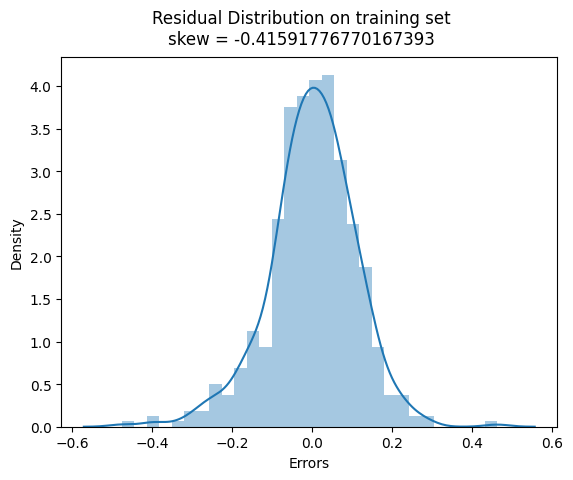

In [41]:
#predicting on training data
y_train_pred = lm_model.predict(X_train_sm)

res = y1_train - y_train_pred
skew = res.skew()
std_dev = res.std()
sns.distplot(res)
plt.suptitle('Residual Distribution on training set' + '\nskew = ' + str(skew))
plt.xlabel('Errors')
plt.show()

In [121]:
X_test.columns

Index(['yr', 'mnth', 'holiday', 'weekday', 'workingday', 'temp', 'atemp',
       'hum', 'windspeed', 'cnt', 'season_2', 'season_3', 'season_4',
       'weathersit_2', 'weathersit_3'],
      dtype='object')

In [42]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

#rescaling the test data
#create a list of features to be scaled

num_vars = ['yr','holiday','weekday','windspeed', 'season_2','season_3','season_4','weathersit_2','weathersit_3']#list of columns to be scaled

X_train[num_vars] = scaler.fit_transform(X_train[num_vars])#column scaling
X_train.head() #checking dataset


yr      mnth  holiday   weekday  workingday      temp     atemp  \
155  0.0  0.454545      0.0  0.000000           0  0.720868  0.690038   
108  0.0  0.272727      0.0  0.333333           1  0.534417  0.513618   
493  1.0  0.363636      0.0  0.500000           1  0.624917  0.601819   
405  1.0  0.090909      0.0  0.833333           1  0.240020  0.242927   
90   0.0  0.272727      0.0  0.833333           1  0.265099  0.228951   

          hum  windspeed       cnt  season_2  season_3  season_4  \
155  0.670951   0.239759  0.561896       1.0       0.0       0.0   
108  0.684661   0.279504  0.366084       1.0       0.0       0.0   
493  0.765210   0.399983  0.540152       1.0       0.0       0.0   
405  0.555270   0.194894  0.438219       0.0       0.0       0.0   
90   0.705656   0.487178  0.253682       1.0       0.0       0.0   

     weathersit_2  weathersit_3  
155           1.0           0.0  
108           1.0           0.0  
493           1.0           0.0  
405           1.0           0.0  
90            1.0           0.0

## Draw scatter diagram for the test set vs predicted.

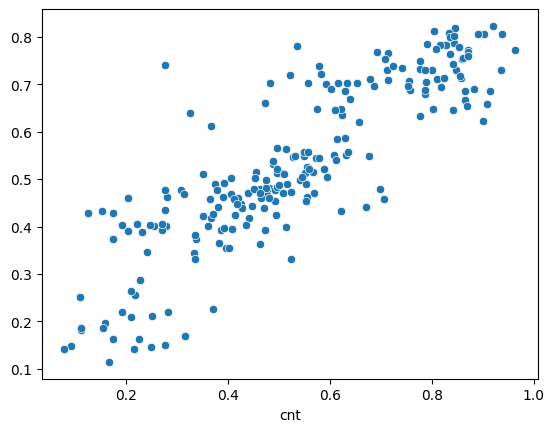

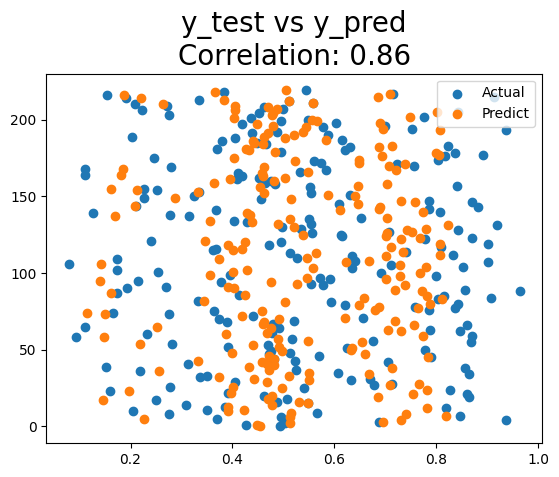

In [45]:
#creating predictor and target variable from test set
y2_test = X_test['cnt']
X2_test = X_test[X_train_rfe.columns]
#adding constant to dataset
X2_test_sm = sm.add_constant(X2_test)

#predicting on test data
y2_test_pred = lm_model.predict(X2_test_sm)
#plotting y_test and y_test_pred
corr = round(np.corrcoef(y2_test, y2_test_pred)[0][1],2)
sns.scatterplot(x = y2_test, y = y2_test_pred)
plt.show()
plt.scatter(y2_test,range(len(y2_test)),label='Actual')
plt.scatter(y2_test_pred,range(len(y2_test)),label='Predict')
plt.legend()
plt.title('y_test vs y_pred' + '\nCorrelation: ' + str(corr), fontsize=20)#Plot heading
# plt.xlabel('y_test', fontsize=18)# X-label
# plt.ylabel('y_pred', fontsize=16)# Y-label
plt.show()

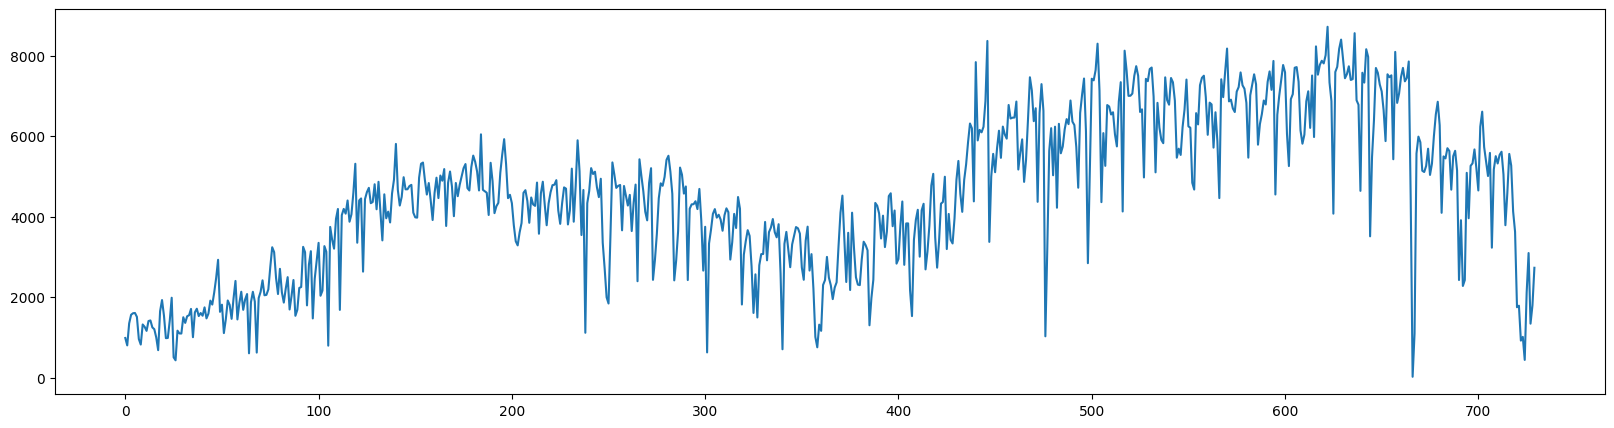

In [46]:
plt.figure(figsize=(20,5))
plt.plot(bikedata.cnt)
plt.show()

In [47]:
from sklearn.metrics import r2_score
r2_score(list(y2_test),y2_test_pred)

0.7374797033768311

## Plot the CNT trained-actual vs trained-predicted

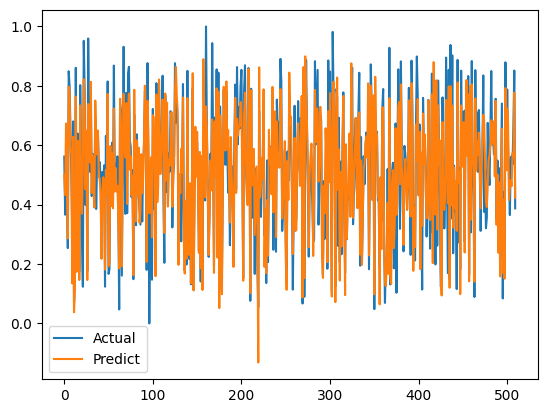

In [48]:
plt.plot(list(y1_train),label='Actual')
plt.plot(y1_train_pred, label='Predict')
plt.legend()


## Plot the CNT test-actual vs test-predicted

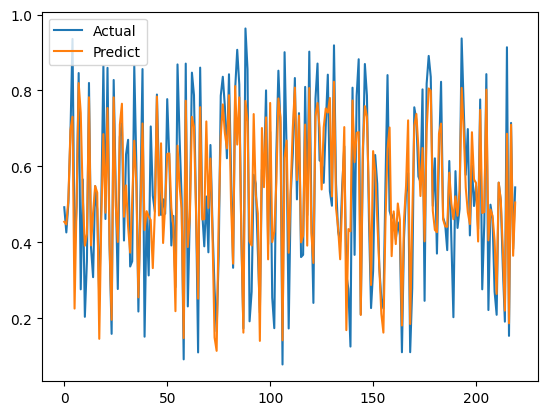

In [49]:
plt.plot(list(y2_test),label='Actual')
plt.plot(list(y2_test_pred), label='Predict')
plt.legend()

#todo: try to run Linear regress with hyper parameter tuning
#all should be calculate by own all r2 and coefficient..etc.

#Resudal .. normalization...
#Create data? EDA


# Assignment Completd by Prem Kumar Subudhi